<a href="https://colab.research.google.com/github/Mstfayldz/Data-Science/blob/master/EncodingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # sklearn kütüphanesi çok önemli

In [5]:
df=sns.load_dataset("titanic")

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
#categorize olan columnlara bakacaz
df[["sex","class","embark_town"]]

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton
...,...,...,...
886,male,Second,Southampton
887,female,First,Southampton
888,female,Third,Southampton
889,male,First,Cherbourg


In [10]:
df[["sex","class","embark_town"]].isna().sum()

,0
sex,0
class,0
embark_town,2


In [15]:
# embar_town daki NAN değerler sadece 2 satır olduğu için bunları drop edebilirim
df.dropna(subset=["embark_town"],inplace=True)

In [16]:
df[["sex","class","embark_town"]].isna().sum()

,0
sex,0
class,0
embark_town,0


In [17]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# One Hot Encoding

In [18]:
df["sex"].value_counts()

,count
sex,
male,577
female,312


In [19]:
df["embark_town"].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [20]:
df["class"].value_counts()

,count
class,
Third,491
First,214
Second,184


**GET DUMMİES**==>one hot encodingin  pandas kütüphanesiyle  yapılması

In [21]:
df_onehot=pd.get_dummies(df,columns=["sex","embark_town","class"],drop_first=True)


**Burda true/false yöntemiyle hallediyor örneğin sex için sex_male oluşturdu ve eğer sex_male true ise male false ise  female
veya embark_town da 3 şehir vardı ama 2 columna düştü eğer oluşan 2 columnda false olursa yazılamamış olan şehir demektir**

In [22]:
df_onehot

,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,deck,alive,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,S,man,True,NaN,no,False,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,C,woman,False,C,yes,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,S,woman,False,NaN,yes,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,S,woman,False,C,yes,False,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,S,man,True,NaN,no,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,man,True,NaN,no,True,True,False,True,True,False
887,1,1,19.0,0,0,30.0000,S,woman,False,B,yes,True,False,False,True,False,False
888,0,3,NaN,1,2,23.4500,S,woman,False,NaN,no,False,False,False,True,False,True
889,1,1,26.0,0,0,30.0000,C,man,True,C,yes,True,True,False,False,False,False


# Label Encoding

In [23]:
label_encoder=LabelEncoder()# çağırdığımız LabelEncoder dan obje oluşturduk

In [24]:
df_label=df.copy()

In [25]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [26]:
df_label["sex"]=label_encoder.fit_transform(df_label["sex"])# burda direk sex columnunu değiştirdik istesek başka column da ekleyip yapabilirdik

In [28]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Ordinal Encoding

In [30]:
df_ordinal=df.copy()

In [34]:
class_order=["Third","Second","First"] # sıralamyı kendin belirlersin  third=0 second=1 first=2

In [35]:
ordinal_encoder=OrdinalEncoder(categories=[class_order])
df_ordinal["class"]=ordinal_encoder.fit_transform(df_ordinal[["class"]])

In [36]:
df_ordinal

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,0.0,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,2.0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,0.0,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,2.0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,0.0,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1.0,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,2.0,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,0.0,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,2.0,man,True,C,Cherbourg,yes,True


In [37]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'Original'}, xlabel='sex_male'>

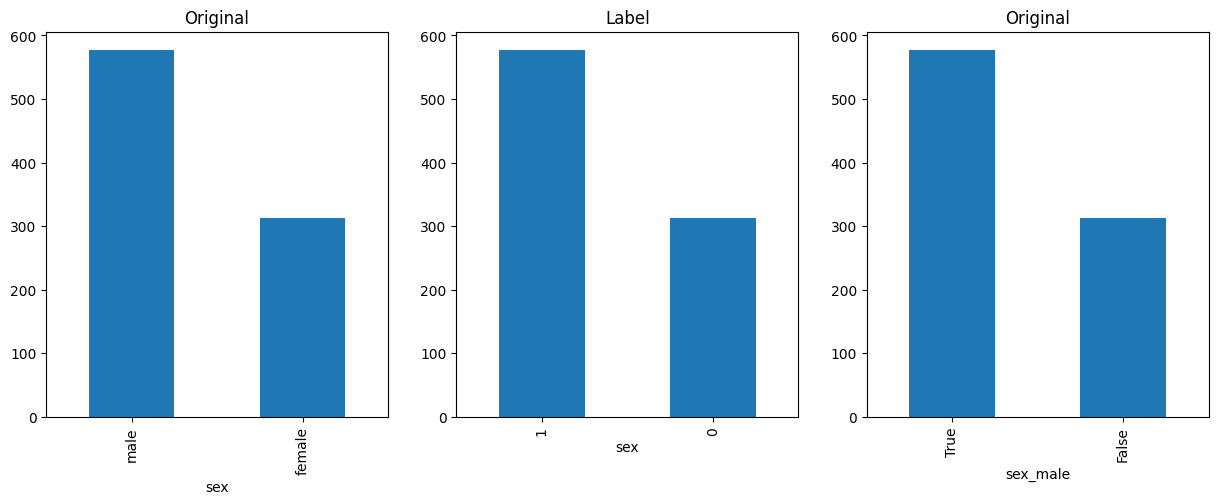

In [45]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
df["sex"].value_counts().plot(kind="bar",title="Original",ax=ax[0])
df_label["sex"].value_counts().plot(kind="bar",title="Label",ax=ax[1])
df_onehot["sex_male"].value_counts().plot(kind="bar",title="One hot Encoded",ax=ax[2])

<Axes: title={'center': 'One hot Encoded'}, xlabel='class_Third'>

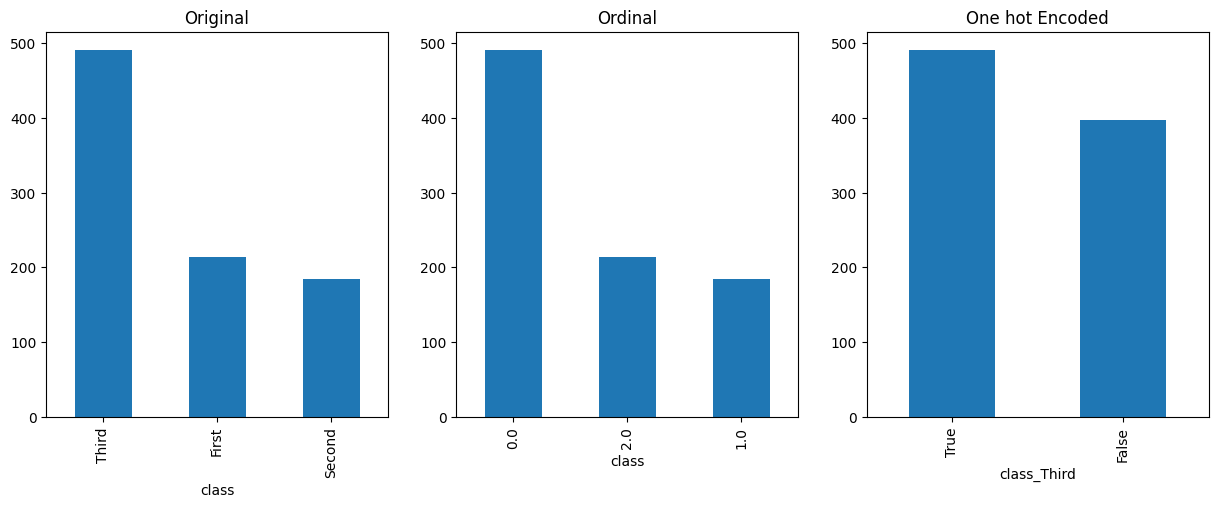

In [46]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
df["class"].value_counts().plot(kind="bar",title="Original",ax=ax[0])
df_ordinal["class"].value_counts().plot(kind="bar",title="Ordinal",ax=ax[1])
df_onehot["class_Third"].value_counts().plot(kind="bar",title="One hot Encoded",ax=ax[2])

<Axes: title={'center': 'One hot Encoded'}, xlabel='embark_town_Queenstown'>

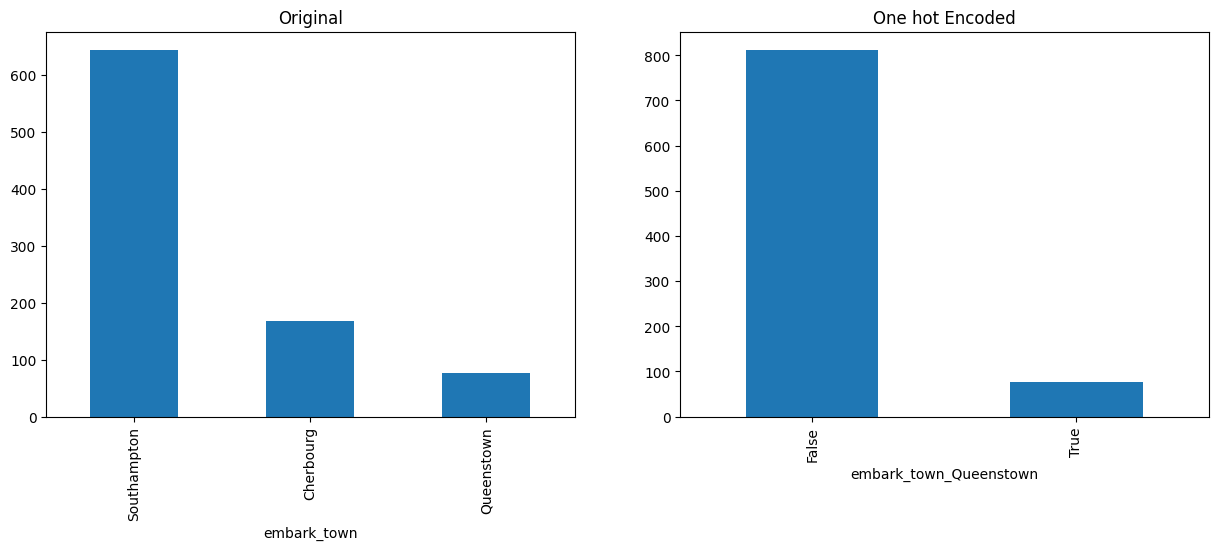

In [48]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
df["embark_town"].value_counts().plot(kind="bar",title="Original",ax=ax[0])
df_onehot["embark_town_Queenstown"].value_counts().plot(kind="bar",title="One hot Encoded",ax=ax[1])